In [508]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [509]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

# Efecto fotoeléctrico.

In [510]:
def Minimos_cuadrados(x,y,n=1):
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

def GetError(x,y,p,n=1):
    
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    # Residuos
    R = y - np.dot(A,p)
    
    sigma2 = np.dot(R.T,R)/(len(y)-len(p))
    
    Cov = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    R2 = None
    if np.shape(Cov) == (2,2):
        R2 = (Cov[0][1]**2)/(Cov[0][0]*Cov[1][1])

    return (Cov,R2,R)

def Get_sigma(Cov):
    sigmaai = np.sqrt(np.diagonal(Cov))
    return sigmaai[::-1]

X = sym.Symbol('x',real=True)
Y = sym.Symbol('y',real=True)

# Datos.

In [511]:
intensidades = np.array([10, 9.5, 9, 8.5, 8, 7.5, 7, 6.5, 6, 5.5, 5, 4.5, 4, 3.5, 3, 2.5, 2, 1.5, 1, 0.5])

voltajes_rojo = np.array([80, 93, 103, 113, 122, 131, 140, 149, 157, 166, 176, 185, 195, 205, 217, 228, 242, 263, 289, 321])
voltajes_amarillo = np.array([312, 320, 326, 329, 336, 344, 349, 356, 362, 370, 378, 385, 397, 406, 416, 430, 445, 463, 482, 521])
voltajes_verde = np.array([689, 692, 694, 695, 697, 699, 701, 702, 704, 705, 707, 709, 711, 713, 715, 717, 719, 721, 723, 725])
voltajes_azul = np.array([861, 862, 863, 865, 866, 868, 868, 870, 870, 871, 872, 872, 873, 874, 874, 875, 876, 877, 878, 879])
voltajes_rojo_x9 = np.array([324, 328, 337, 342, 343, 348, 351, 354, 357, 361, 364, 368, 373, 377, 382, 386, 391, 397, 402, 410])

In [512]:
error_x = 0.25

# Análisis.

Rojo

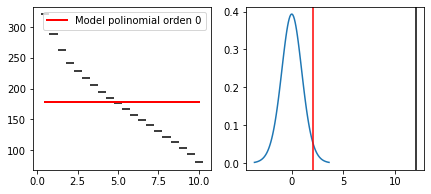

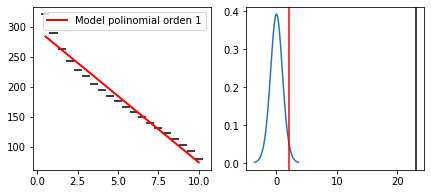

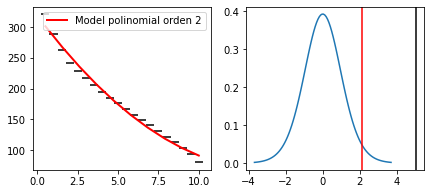

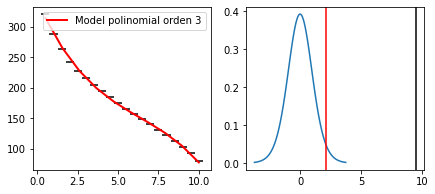

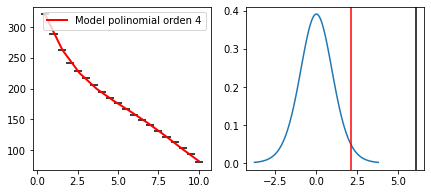

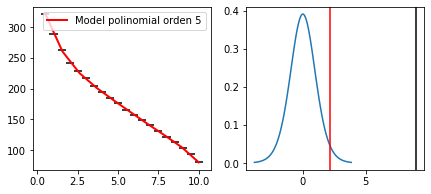

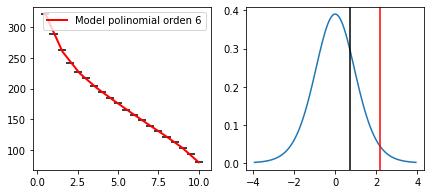

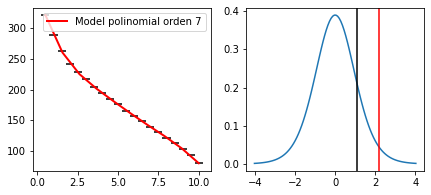

In [513]:
# Miramos cual es el mejor modelo:

for n in range(8):
    
    param = Minimos_cuadrados(intensidades,voltajes_rojo,n)
    Cov,R2,r = GetError(intensidades,voltajes_rojo,param,n)
    
    _x = np.linspace(np.min(intensidades),np.max(intensidades),10)
    _y = GetModel(_x,param)
    
    ai = param[-1]
    sigmaai = np.sqrt(Cov[-1,-1])
    
    tobs = np.abs(0. - ai)/sigmaai
    
    df = len(intensidades) - len(param) - 1
    #print(df)
    
    tcritico = t.ppf(0.975,df=df)
    tcritico

    #print(ai,sigmaai,tobs,tcritico)
    
    fig = plt.figure(figsize=(7,3))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    
    ax.errorbar(intensidades,voltajes_rojo, xerr= error_x, fmt='none', ecolor='black')
    ax.plot(_x,_y,color='r',lw=2,label='Model polinomial orden {}'.format(n))
    ax.legend()
    
    _t = np.linspace(t.ppf(0.001,df=df),t.ppf(0.999,df=df),100)
    ax1.plot(_t,t.pdf(_t,df=df))
    ax1.axvline(x=tobs,color='k')
    ax1.axvline(x=tcritico,color='r')

In [514]:
# El mejor modelo es el polinomio de grado 5
n=5
param = Minimos_cuadrados(intensidades,voltajes_rojo,n)
param

array([ 3.65250155e+02, -1.00662225e+02,  2.78156791e+01, -4.68500989e+00,
        3.91198946e-01, -1.28724368e-02])

In [515]:
param_ = param[::-1]
param_

array([-1.28724368e-02,  3.91198946e-01, -4.68500989e+00,  2.78156791e+01,
       -1.00662225e+02,  3.65250155e+02])

In [516]:
Cov,R2,r = GetError(intensidades,voltajes_rojo,param,n)

In [517]:
deltas = Get_sigma(Cov)
deltas

array([1.43154781e-03, 3.77391698e-02, 3.63047989e-01, 1.54638827e+00,
       2.78407918e+00, 1.58685098e+00])

In [518]:
# Voltaje de frenado:
param_[-1]*1e-03

0.36525015479853395

In [519]:
#Incertidumbre del voltaje de frenado:
deltas[-1]

1.5868509765164616

In [520]:
_x = np.linspace(np.min(intensidades),np.max(intensidades),50)
_y = GetModel(_x,param)

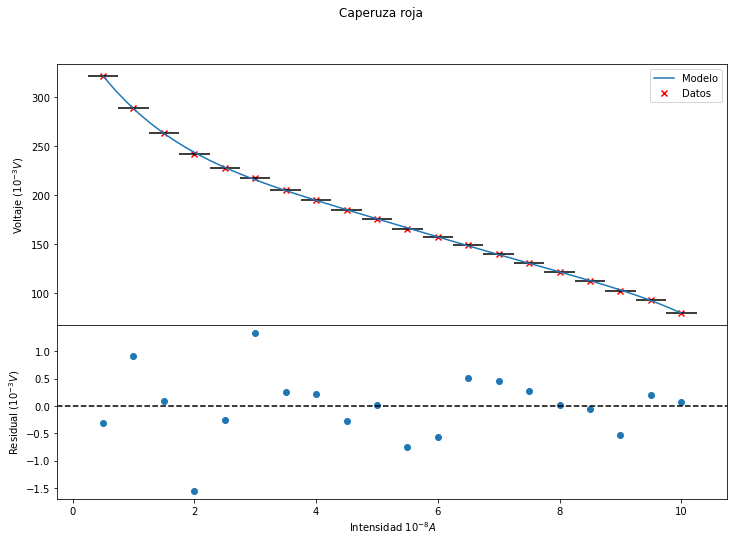

In [521]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)

fig.suptitle('Caperuza roja')
axs[0].scatter(intensidades,voltajes_rojo,label='Datos',color='r',marker='x')
axs[0].errorbar(intensidades,voltajes_rojo, xerr= error_x, fmt='none', ecolor='black')
axs[0].plot(_x,_y,label='Modelo')
axs[0].set_ylabel('Voltaje ($10^{-3}V$)')
axs[0].legend()

axs[1].scatter(intensidades,r)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('Intensidad $10^{-8}A$')
axs[1].set_ylabel('Residual ($10^{-3}V$)')
#axs[1].set_ylim(-1.7,1.7)
#axs[1].set_yticks(np.arange(-1.5, 2., 0.5))
plt.show()

Amarillo

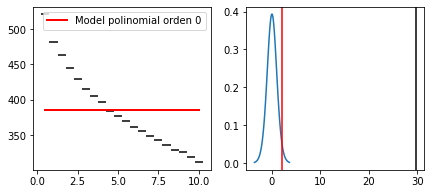

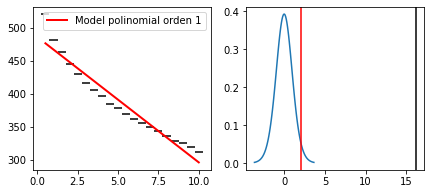

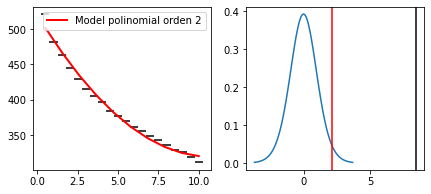

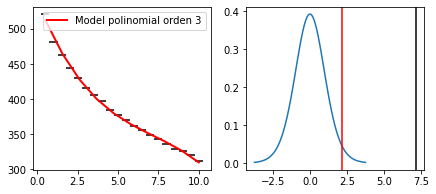

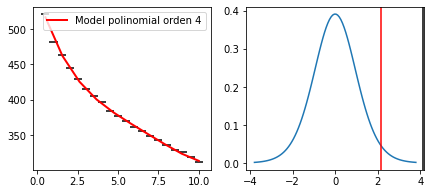

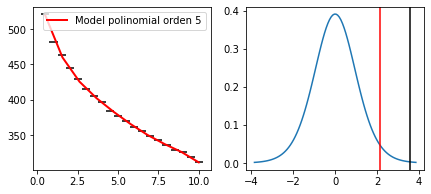

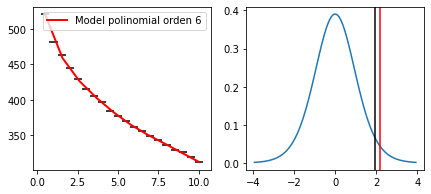

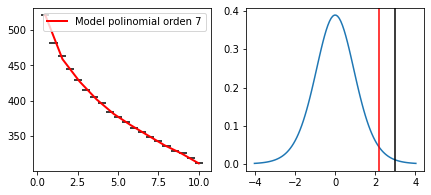

In [522]:
for n in range(8):
    
    param = Minimos_cuadrados(intensidades,voltajes_amarillo,n)
    Cov,R2,r = GetError(intensidades,voltajes_amarillo,param,n)
    #print(param)
    _x = np.linspace(np.min(intensidades),np.max(intensidades),10)
    _y = GetModel(_x,param)
    
    ai = param[-1]
    sigmaai = np.sqrt(Cov[-1,-1])
    
    tobs = np.abs(0. - ai)/sigmaai
    
    df = len(intensidades) - len(param) - 1
    #print(df)
    
    tcritico = t.ppf(0.975,df=df)
    tcritico

    #print(ai,sigmaai,tobs,tcritico)
    
    fig = plt.figure(figsize=(7,3))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    
    ax.errorbar(intensidades,voltajes_amarillo, xerr= error_x, fmt='none', ecolor='black')
    ax.plot(_x,_y,color='r',lw=2,label='Model polinomial orden {}'.format(n))
    ax.legend()
    
    _t = np.linspace(t.ppf(0.001,df=df),t.ppf(0.999,df=df),100)
    ax1.plot(_t,t.pdf(_t,df=df))
    ax1.axvline(x=tobs,color='k')
    ax1.axvline(x=tcritico,color='r')

Verde

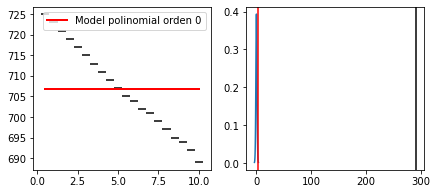

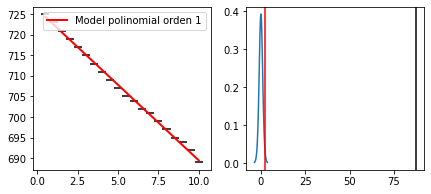

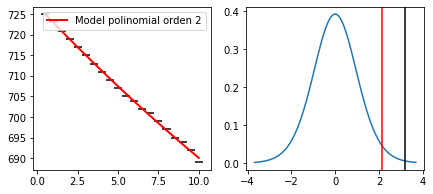

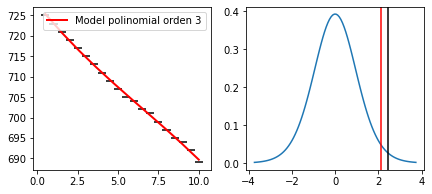

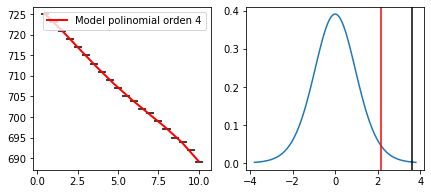

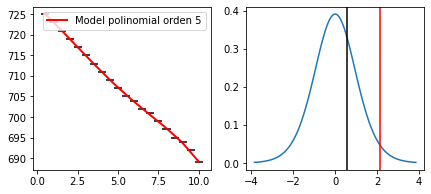

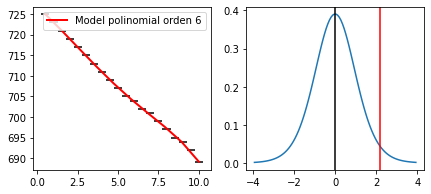

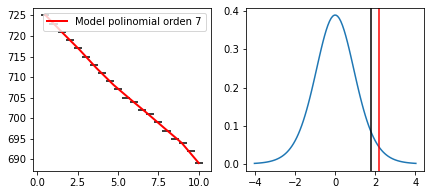

In [523]:
for n in range(8):
    
    param = Minimos_cuadrados(intensidades,voltajes_verde,n)
    Cov,R2,r = GetError(intensidades,voltajes_verde,param,n)
    #print(param)
    _x = np.linspace(np.min(intensidades),np.max(intensidades),10)
    _y = GetModel(_x,param)
    
    ai = param[-1]
    sigmaai = np.sqrt(Cov[-1,-1])
    
    tobs = np.abs(0. - ai)/sigmaai
    
    df = len(intensidades) - len(param) - 1
    #print(df)
    
    tcritico = t.ppf(0.975,df=df)
    tcritico

    #print(ai,sigmaai,tobs,tcritico)
    
    fig = plt.figure(figsize=(7,3))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    
    ax.errorbar(intensidades,voltajes_verde, xerr= error_x, fmt='none', ecolor='black')
    ax.plot(_x,_y,color='r',lw=2,label='Model polinomial orden {}'.format(n))
    ax.legend()
    
    _t = np.linspace(t.ppf(0.001,df=df),t.ppf(0.999,df=df),100)
    ax1.plot(_t,t.pdf(_t,df=df))
    ax1.axvline(x=tobs,color='k')
    ax1.axvline(x=tcritico,color='r')

In [524]:
param = Minimos_cuadrados(intensidades,voltajes_verde)
(param[1],param[0])

(-3.66616541353386, 726.1473684210529)

In [525]:
Cov,R2,r = GetError(intensidades,voltajes_verde,param)
delta_m = np.sqrt(Cov[-1][-1])
delta_b = np.sqrt(Cov[0][0])
(delta_m,delta_b)

(0.041973777274101405, 0.2514050566004578)

In [526]:
R2

0.7682926829268292

In [527]:
r

array([-0.48571429,  0.68120301,  0.8481203 ,  0.01503759,  0.18195489,
        0.34887218,  0.51578947, -0.31729323, -0.15037594, -0.98345865,
       -0.81654135, -0.64962406, -0.48270677, -0.31578947, -0.14887218,
        0.01804511,  0.18496241,  0.3518797 ,  0.51879699,  0.68571429])

In [528]:
error_y = np.sqrt((intensidades*delta_m)**2 + (param[1]*error_x)**2 + (delta_b**2))

In [529]:
_x = np.linspace(np.min(intensidades),np.max(intensidades),50)
_y = GetModel(_x,param)

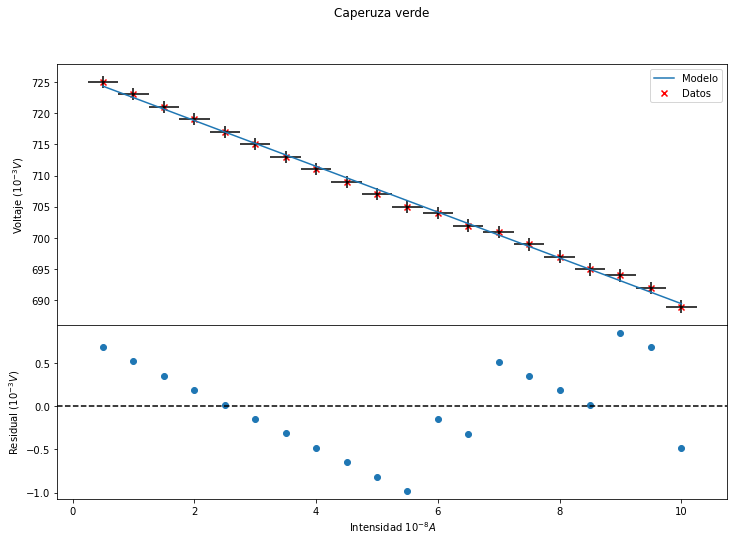

In [530]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)

fig.suptitle('Caperuza verde')
axs[0].scatter(intensidades,voltajes_verde,label='Datos',color='r',marker='x')
axs[0].errorbar(intensidades,voltajes_verde, xerr= error_x,yerr= error_y, fmt='none', ecolor='black')
axs[0].plot(_x,_y,label='Modelo')
axs[0].set_ylabel('Voltaje ($10^{-3}V$)')
#axs[0].text(421,430,'$y = (1.27 \pm 0.01) x + (23 \pm 6)$\n$R^{2} = 0.966$',fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
axs[0].legend()

axs[1].scatter(intensidades,r)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('Intensidad $10^{-8}A$')
axs[1].set_ylabel('Residual ($10^{-3}V$)')
#axs[1].set_ylim(-1.7,1.7)
#axs[1].set_yticks(np.arange(-1.5, 2., 0.5))

plt.show()

Azúl

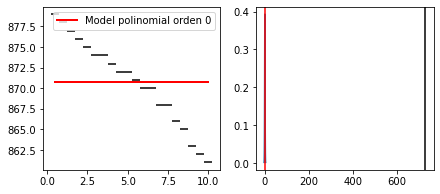

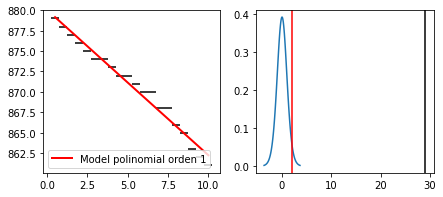

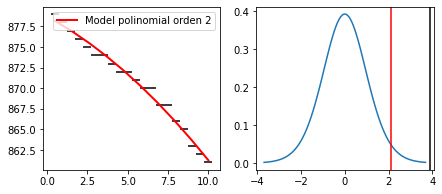

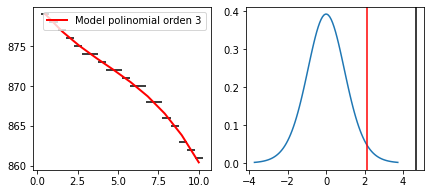

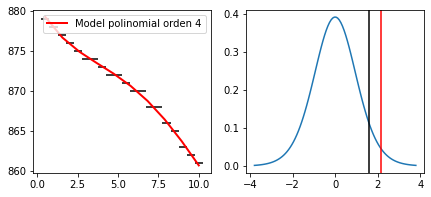

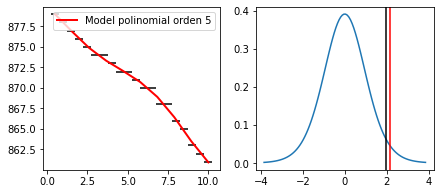

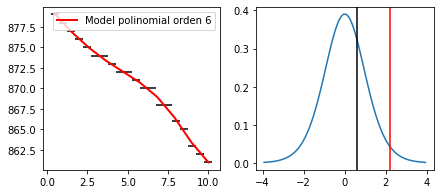

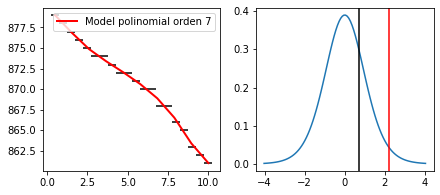

In [531]:
for n in range(8):
    
    param = Minimos_cuadrados(intensidades,voltajes_azul,n)
    Cov,R2,r = GetError(intensidades,voltajes_azul,param,n)
    #print(param)
    _x = np.linspace(np.min(intensidades),np.max(intensidades),10)
    _y = GetModel(_x,param)
    
    ai = param[-1]
    sigmaai = np.sqrt(Cov[-1,-1])
    
    tobs = np.abs(0. - ai)/sigmaai
    
    df = len(intensidades) - len(param) - 1
    #print(df)
    
    tcritico = t.ppf(0.975,df=df)
    tcritico

    #print(ai,sigmaai,tobs,tcritico)
    
    fig = plt.figure(figsize=(7,3))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    
    ax.errorbar(intensidades,voltajes_azul, xerr= error_x, fmt='none', ecolor='black')
    ax.plot(_x,_y,color='r',lw=2,label='Model polinomial orden {}'.format(n))
    ax.legend()
    
    _t = np.linspace(t.ppf(0.001,df=df),t.ppf(0.999,df=df),100)
    ax1.plot(_t,t.pdf(_t,df=df))
    ax1.axvline(x=tobs,color='k')
    ax1.axvline(x=tcritico,color='r')

In [532]:
param = Minimos_cuadrados(intensidades,voltajes_azul)
(param[1],param[0])

(-1.7804511278195796, 880.0473684210529)

In [533]:
Cov,R2,r = GetError(intensidades,voltajes_azul,param)
delta_m = np.sqrt(Cov[-1][-1])
delta_b = np.sqrt(Cov[0][0])
(delta_m,delta_b)

(0.06114055506635786, 0.3662058958064116)

In [534]:
R2

0.7682926829268291

In [535]:
r

array([-1.24285714, -1.13308271, -1.02330827,  0.08646617,  0.1962406 ,
        1.30601504,  0.41578947,  1.52556391,  0.63533835,  0.74511278,
        0.85488722, -0.03533835,  0.07443609,  0.18421053, -0.70601504,
       -0.5962406 , -0.48646617, -0.37669173, -0.26691729, -0.15714286])

In [536]:
error_y = np.sqrt((intensidades*delta_m)**2 + (param[1]*error_x)**2 + (delta_b**2))

In [537]:
_x = np.linspace(np.min(intensidades),np.max(intensidades),50)
_y = GetModel(_x,param)

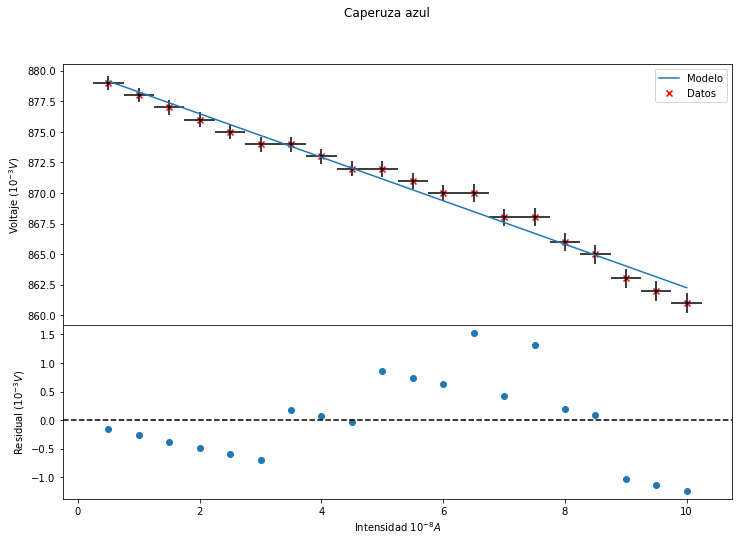

In [538]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)

fig.suptitle('Caperuza azul')
axs[0].scatter(intensidades,voltajes_azul,label='Datos',color='r',marker='x')
axs[0].errorbar(intensidades,voltajes_azul, xerr= error_x,yerr= error_y, fmt='none', ecolor='black')
axs[0].plot(_x,_y,label='Modelo')
axs[0].set_ylabel('Voltaje ($10^{-3}V$)')
#axs[0].text(421,430,'$y = (1.27 \pm 0.01) x + (23 \pm 6)$\n$R^{2} = 0.966$',fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
axs[0].legend()

axs[1].scatter(intensidades,r)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('Intensidad $10^{-8}A$')
axs[1].set_ylabel('Residual ($10^{-3}V$)')
#axs[1].set_ylim(-1.7,1.7)
#axs[1].set_yticks(np.arange(-1.5, 2., 0.5))

plt.show()

Rojo x10^-9

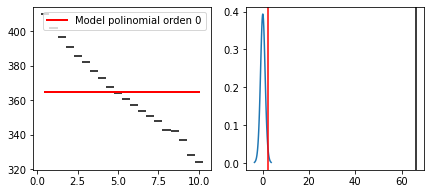

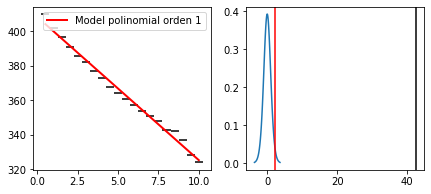

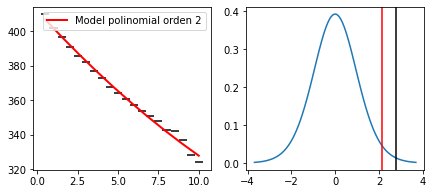

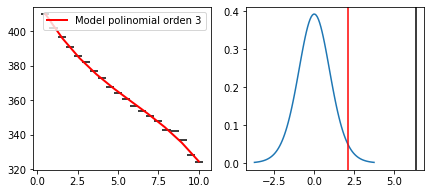

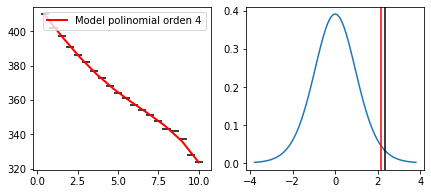

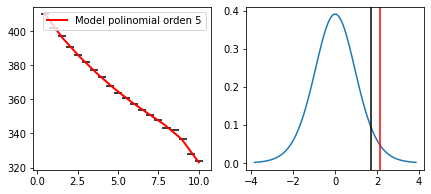

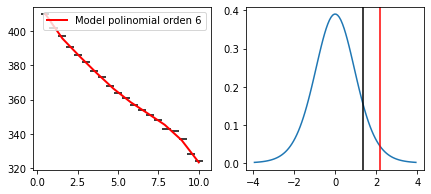

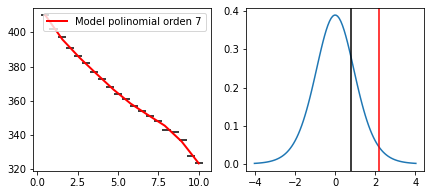

In [539]:
for n in range(8):
    
    param = Minimos_cuadrados(intensidades,voltajes_rojo_x9,n)
    Cov,R2,r = GetError(intensidades,voltajes_rojo_x9,param,n)
    #print(param)
    _x = np.linspace(np.min(intensidades),np.max(intensidades),10)
    _y = GetModel(_x,param)
    
    ai = param[-1]
    sigmaai = np.sqrt(Cov[-1,-1])
    
    tobs = np.abs(0. - ai)/sigmaai
    
    df = len(intensidades) - len(param) - 1
    #print(df)
    
    tcritico = t.ppf(0.975,df=df)
    tcritico

    #print(ai,sigmaai,tobs,tcritico)
    
    fig = plt.figure(figsize=(7,3))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    
    ax.errorbar(intensidades,voltajes_rojo_x9, xerr= error_x, fmt='none', ecolor='black')
    ax.plot(_x,_y,color='r',lw=2,label='Model polinomial orden {}'.format(n))
    ax.legend()
    
    _t = np.linspace(t.ppf(0.001,df=df),t.ppf(0.999,df=df),100)
    ax1.plot(_t,t.pdf(_t,df=df))
    ax1.axvline(x=tobs,color='k')
    ax1.axvline(x=tcritico,color='r')

In [540]:
param = Minimos_cuadrados(intensidades,voltajes_rojo_x9)
(param[1],param[0])

(-8.302255639097757, 408.33684210526326)

In [541]:
Cov,R2,r = GetError(intensidades,voltajes_rojo_x9,param)
delta_m = np.sqrt(Cov[-1][-1])
delta_b = np.sqrt(Cov[0][0])
(delta_m,delta_b)

(0.19566022937354727, 1.1719214765659494)

In [542]:
R2

0.7682926829268292

In [543]:
r

array([-1.31428571, -1.46541353,  3.38345865,  4.23233083,  1.08120301,
        1.93007519,  0.77894737, -0.37218045, -1.52330827, -1.67443609,
       -2.82556391, -2.97669173, -2.12781955, -2.27894737, -1.43007519,
       -1.58120301, -0.73233083,  1.11654135,  1.96541353,  5.81428571])

In [544]:
error_y = np.sqrt((intensidades*delta_m)**2 + (param[1]*error_x)**2 + (delta_b**2))

In [545]:
_x = np.linspace(np.min(intensidades),np.max(intensidades),50)
_y = GetModel(_x,param)

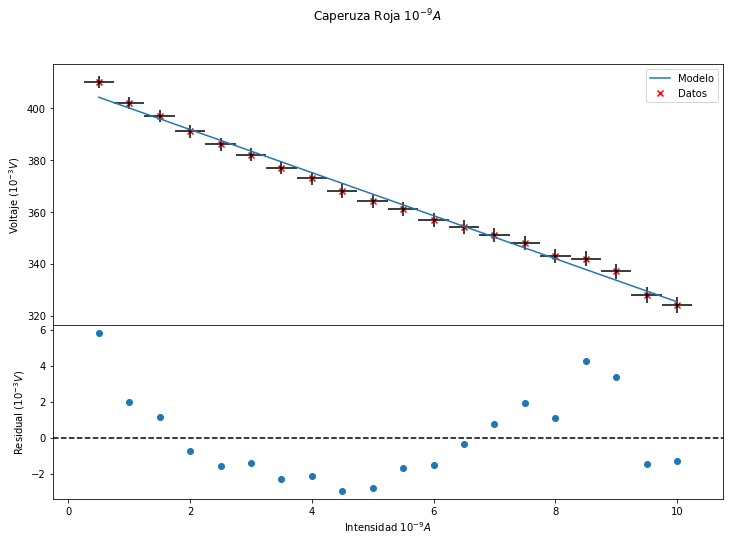

In [546]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)

fig.suptitle('Caperuza Roja $10^{-9}A$')
axs[0].scatter(intensidades,voltajes_rojo_x9,label='Datos',color='r',marker='x')
axs[0].errorbar(intensidades,voltajes_rojo_x9, xerr= error_x,yerr= error_y, fmt='none', ecolor='black')
axs[0].plot(_x,_y,label='Modelo')
axs[0].set_ylabel('Voltaje ($10^{-3}V$)')
#axs[0].text(421,430,'$y = (1.27 \pm 0.01) x + (23 \pm 6)$\n$R^{2} = 0.966$',fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
axs[0].legend()

axs[1].scatter(intensidades,r)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('Intensidad $10^{-9}A$')
axs[1].set_ylabel('Residual ($10^{-3}V$)')
#axs[1].set_ylim(-1.7,1.7)
#axs[1].set_yticks(np.arange(-1.5, 2., 0.5))

plt.show()